

#Punto 1




1. crear un archivo con minimo 2000 lineas de  canciones ( sin repetir) de su artista favorito
2. Crear un modelo de generacion  de texto usando una red SimpleRnN on una red LSTM
3. Generar algunas lineas de texto a partir de una palabra dada

In [ ]:
# librerías para dataframes
import pandas as pd
import numpy  as np

# expresiones regulares
import re

# liberías para el embedding
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence   import pad_sequences
from tensorflow.keras.preprocessing.text       import Tokenizer
from tensorflow.keras.utils                    import to_categorical

# librerías de keras para las redes neuronales
from tensorflow.keras.models                   import Sequential
from tensorflow.keras.layers                   import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D

# otras librerías
import string
import requests
import requests
from bs4 import BeautifulSoup
import time

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

# Lista de URLs de canciones en letras.com (simulados)
urls = [
    'https://www.letras.com/diaz-diomedes/hija/',
    'https://www.letras.com/diaz-diomedes/bonita/',
    'https://www.letras.com/diaz-diomedes/mi-ahijado/',
    'https://www.letras.com/diaz-diomedes/amores-que-se-van/',
    'https://www.letras.com/diaz-diomedes/la-ventana-marroncita/',
    'https://www.letras.com/diaz-diomedes/tu-cumpleanos/',
    'https://www.letras.com/diaz-diomedes/nacio-mi-poesia/',
    'https://www.letras.com/diaz-diomedes/mis-mejores-dias/',
    'https://www.letras.com/diaz-diomedes/lloraras/',
    'https://www.letras.com/diaz-diomedes/reina-de-mi-alma/',
    'https://www.letras.com/diaz-diomedes/suenos-y-vivencias/',
    'https://www.letras.com/diaz-diomedes/al-final-del-camino/',
    'https://www.letras.com/diaz-diomedes/mi-primavera/',
    'https://www.letras.com/diaz-diomedes/la-suerte-esta-echada/',
    'https://www.letras.com/diaz-diomedes/camino-de-los-recuerdos/',
    'https://www.letras.com/diaz-diomedes/entre-palos-y-estacas/',
    'https://www.letras.com/diaz-diomedes/si-te-vas/',
    'https://www.letras.com/diaz-diomedes/mi-biografia/',
    'https://www.letras.com/diaz-diomedes/para-mi-familia/',
    'https://www.letras.com/diaz-diomedes/la-fama/',
    'https://www.letras.com/diaz-diomedes/el-cacique-y-el-fuete/',
    'https://www.letras.com/diaz-diomedes/el-regreso-del-condor/',
    'https://www.letras.com/diaz-diomedes/mis-mejores-anos/',
    'https://www.letras.com/diaz-diomedes/donde-estas-corazon/',
    'https://www.letras.com/diaz-diomedes/el-nino-del-amor/',
    'https://www.letras.com/diaz-diomedes/la-ventana-abierta/',
    'https://www.letras.com/diaz-diomedes/el-cariño/',
    'https://www.letras.com/diaz-diomedes/mi-cantante-favorita/',
    'https://www.letras.com/diaz-diomedes/el-rey-de-mi-alma/',
    'https://www.letras.com/diaz-diomedes/mi-heredero/',
    'https://www.letras.com/diaz-diomedes/el-mundo-sigue-igual/',
    'https://www.letras.com/diaz-diomedes/corazon-loco/',
    'https://www.letras.com/diaz-diomedes/mi-vida-cambio/',
    'https://www.letras.com/diaz-diomedes/volver-a-la-vida/',
    'https://www.letras.com/diaz-diomedes/el-nino-jesus/',
    'https://www.letras.com/diaz-diomedes/siempre-te-amare/',
    'https://www.letras.com/diaz-diomedes/te-quiero-mi-amor/',
    'https://www.letras.com/diaz-diomedes/el-hijo-del-amor/',
    'https://www.letras.com/diaz-diomedes/cancion-para-mi-madre/',
    'https://www.letras.com/diaz-diomedes/por-ti-soy-feliz/',
    'https://www.letras.com/diaz-diomedes/recuerdo-de-un-amor/',
    'https://www.letras.com/diaz-diomedes/seras-mi-eterno-amor/',
    'https://www.letras.com/diaz-diomedes/dios-me-ha-bendecido/',
    'https://www.letras.com/diaz-diomedes/la-cancion-de-mi-vida/',
    'https://www.letras.com/diaz-diomedes/el-querer-de-mi-alma/',
    'https://www.letras.com/diaz-diomedes/la-vida-es-una-sola/',
    'https://www.letras.com/diaz-diomedes/por-que-te-vas/',
    'https://www.letras.com/diaz-diomedes/mis-alegrias/',
    'https://www.letras.com/diaz-diomedes/nuestra-historia/',
    'https://www.letras.com/diaz-diomedes/el-angel-de-mi-alma/',
    'https://www.letras.com/diaz-diomedes/mi-corazon-es-tuyo/',
    'https://www.letras.com/diaz-diomedes/la-dicha-de-quererte/',
    'https://www.letras.com/diaz-diomedes/el-dolor-de-amor/',
    'https://www.letras.com/diaz-diomedes/mi-alegria-es-tu-amor/',
    'https://www.letras.com/diaz-diomedes/sentimiento-vallenato/',
    'https://www.letras.com/diaz-diomedes/cancion-de-mi-pueblo/',
    'https://www.letras.com/diaz-diomedes/tu-amor-es-para-siempre/',
    'https://www.letras.com/diaz-diomedes/el-poder-del-amor/',
    'https://www.letras.com/diaz-diomedes/mis-suenos-contigo/',
    'https://www.letras.com/diaz-diomedes/el-amor-es-asi/',
    'https://www.letras.com/diaz-diomedes/no-te-vayas-mi-amor/',
    'https://www.letras.com/hector-lavoe/1013164/',
    'https://www.letras.com/hector-lavoe/453110/',
    'https://www.letras.com/hector-lavoe/581111/',
    'https://www.letras.com/hector-lavoe/1576121/',
    'https://www.letras.com/hector-lavoe/1681631/',
    'https://www.letras.com/hector-lavoe/emborrachame-de-amor/',
    'https://www.letras.com/hector-lavoe/581110/',
    'https://www.letras.com/hector-lavoe/596142/',
    'https://www.letras.com/hector-lavoe/escarcha/',
    'https://www.letras.com/hector-lavoe/581109/',
    'https://www.letras.com/hector-lavoe/la-fama/',
    'https://www.letras.com/hector-lavoe/581108/',
    'https://www.letras.com/hector-lavoe/607044/',
    'https://www.letras.com/hector-lavoe/607043/',
    'https://www.letras.com/hector-lavoe/661685/',
    'https://www.letras.com/hector-lavoe/triste-y-vacia/',
    'https://www.letras.com/hector-lavoe/tus-ojos/',
    'https://www.letras.com/hector-lavoe/consejo-de-oro/',
    'https://www.letras.com/hector-lavoe/loco/',
    'https://www.letras.com/hector-lavoe/un-amor-de-la-calle/',
    'https://www.letras.com/hector-lavoe/1576219/',
    'https://www.letras.com/colon-willie/672833/',
    'https://www.letras.com/colon-willie/agualile/',
    'https://www.letras.com/colon-willie/1594658/',
    'https://www.letras.com/colon-willie/827170/',
    'https://www.letras.com/colon-willie/1594652/',
    'https://www.letras.com/colon-willie/755793/',
    'https://www.letras.com/colon-willie/asia/',
    'https://www.letras.com/colon-willie/1594390/',
    'https://www.letras.com/colon-willie/827171/',
    'https://www.letras.com/colon-willie/1594391/',
    'https://www.letras.com/colon-willie/675763/',
    'https://www.letras.com/colon-willie/carmelina/',
    'https://www.letras.com/colon-willie/755794/',
    'https://www.letras.com/colon-willie/1594400/',
    'https://www.letras.com/colon-willie/color-americano/',
    'https://www.letras.com/colon-willie/675764/',
    'https://www.letras.com/colon-willie/1594651/',
    'https://www.letras.com/colon-willie/1594393/',
    'https://www.letras.com/colon-willie/675765/',
    'https://www.letras.com/colon-willie/el-diablo/',
    'https://www.letras.com/colon-willie/eso-se-baila-asi/',
    'https://www.letras.com/colon-willie/755795/',
    'https://www.letras.com/colon-willie/8262/',
    'https://www.letras.com/colon-willie/755796/',
    'https://www.letras.com/colon-willie/675768/',
    'https://www.letras.com/colon-willie/672831/',
    'https://www.letras.com/colon-willie/los-olores-del-amor/',
    'https://www.letras.com/colon-willie/755797/',
    'https://www.letras.com/colon-willie/1594389/',
    'https://www.letras.com/colon-willie/narcomula/',
    'https://www.letras.com/colon-willie/no/',
    'https://www.letras.com/colon-willie/no-me-fio-mas/',
    'https://www.letras.com/colon-willie/1819351/',
    'https://www.letras.com/colon-willie/672840/',
    'https://www.letras.com/colon-willie/1594392/',
    'https://www.letras.com/colon-willie/pregunta-por-ahi/',
    'https://www.letras.com/colon-willie/755798/',
    'https://www.letras.com/colon-willie/827172/',
    'https://www.letras.com/colon-willie/1594650/',
    'https://www.letras.com/colon-willie/417303/',
    'https://www.letras.com/colon-willie/417303/',
    'https://www.letras.com/colon-willie/672832/',
    'https://www.letras.com/colon-willie/soltera/',
    'https://www.letras.com/colon-willie/675770/',
    'https://www.letras.com/colon-willie/tiempo-pa-matar/',
    'https://www.letras.com/colon-willie/1594387/',
    'https://www.letras.com/joe-arroyo/867589/',
    'https://www.letras.com/joe-arroyo/1581744/',
    'https://www.letras.com/joe-arroyo/tamarindo-seco/',
    'https://www.letras.com/joe-arroyo/867586/',
    'https://www.letras.com/joe-arroyo/867591/',
    'https://www.letras.com/joe-arroyo/867590/',
    'https://www.letras.com/joe-arroyo/867579/',
    'https://www.letras.com/joe-arroyo/867543/',
    'https://www.letras.com/joe-arroyo/el-torito/',
    'https://www.letras.com/joe-arroyo/no-le-pegues-a-la-negra/',
    'https://www.letras.com/joe-arroyo/mary/',
    'https://www.letras.com/joe-arroyo/867578/',
    'https://www.letras.com/joe-arroyo/867588/',
    'https://www.letras.com/joe-arroyo/las-cajas/',
    'https://www.letras.com/joe-arroyo/1581747/',
    'https://www.letras.com/joe-arroyo/1583142/',
    'https://www.letras.com/joe-arroyo/tania/',
    'https://www.letras.com/joe-arroyo/1581748/',
    'https://www.letras.com/joe-arroyo/1581746/',
    'https://www.letras.com/joe-arroyo/teresa-vuelve/'


]
# Crear archivo para guardar las
# Crear archivo para guardar las letras
max_palabras_por_seccion = 20
with open('letras_diomedes_diaz.txt', 'w', encoding='utf-8') as file:
    for url in urls:
        try:
            # Hacer una solicitud a la página y forzar UTF-8
            response = requests.get(url)
            response.encoding = 'utf-8'

            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')

                # Buscar el contenedor de la letra
                letra_section = soup.find('div', {'class': 'lyric-original'})
                if letra_section:
                    # Extraer el texto de cada párrafo y preservar saltos de línea
                    parrafos = letra_section.find_all('p')
                    letra = "\n".join(p.get_text().strip() for p in parrafos)

                    # Insertar salto de línea antes de cada palabra que empieza con una mayúscula en el medio de una frase
                    letra_procesada = re.sub(r'(?<!^)(?<!\.\s)(?=[A-Z])', '\n', letra)

                    # Dividir la letra en secciones cada cierto número de palabras
                    palabras = letra_procesada.split()
                    secciones = [
                        " ".join(palabras[i:i + max_palabras_por_seccion])
                        for i in range(0, len(palabras), max_palabras_por_seccion)
                    ]

                    # Escribir cada sección de la canción en el archivo sin línea en blanco adicional
                    for seccion in secciones:
                        file.write(seccion + "\n")  # Usa solo un salto de línea

                    print(f"Letras de {url} guardadas con éxito.")
                else:
                    print(f"No se encontró la sección de letra en {url}")
            else:
                print(f"Error al acceder a {url}")
        except Exception as e:
            print(f"Error procesando {url}: {e}")

        time.sleep(2)  # Espera de 2 segundos entre solicitudes

print("Proceso de guardado de letras completado.")

Letras de https://www.letras.com/diaz-diomedes/hija/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/bonita/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/mi-ahijado/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/amores-que-se-van/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/la-ventana-marroncita/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/tu-cumpleanos/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/nacio-mi-poesia/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/mis-mejores-dias/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/lloraras/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/reina-de-mi-alma/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/suenos-y-vivencias/ guardadas con éxito.
Letras de https://www.letras.com/diaz-diomedes/al-final-del-camino/ guardadas con éxit

In [ ]:
# Supongamos que ya tienes un archivo llamado 'letras_diomedes_diaz.txt'

# Contar el número de líneas en el archivo
with open('letras_diomedes_diaz.txt', 'r', encoding='utf-8') as file:
    lineas = file.readlines()
    num_lineas = len(lineas)

print(f'El archivo contiene {num_lineas} líneas.')


El archivo contiene 2105 líneas.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random


In [ ]:
!pip install unidecode



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Importamos las librerías necesarias
import re
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import re
import numpy as np
from unidecode import unidecode
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [ ]:

# 1. Cargar y procesar los datos sin eliminar caracteres especiales
with open('letras_diomedes_diaz.txt', 'r', encoding='utf-8') as file:
    datos = file.read().splitlines()

# Convertir a minúsculas y reemplazar caracteres acentuados con `unidecode`
datos = [unidecode(linea.lower()) for linea in datos if linea.strip()]
print("Ejemplo de datos:", datos[:10])

# 2. Tokenización y encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(datos)
encoded_text = tokenizer.texts_to_sequences(datos)

# Obtener el tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1
print("Tamaño del vocabulario:", vocab_size)

# 3. Generación de secuencias n-gram
sequences = []
for line in encoded_text:
    for i in range(2, len(line) + 1):
        sequences.append(line[:i])

print("Primeras 5 secuencias n-gram:", sequences[:5])

# 4. Padding
max_sequence_len = 20  # longitud máxima de las secuencias
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')
print("Forma de las secuencias después de padding:", sequences.shape)

# 5. Separación de variables predictoras (X) y variable de respuesta (y)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Ejemplo de datos: ['como nace el viento, como llega el verso apareciste tu llenandolo todo abarcandolo todo de donde es la dicha apareciste', 'tu mi nina es tan bella, que le dicen reina una multitud eso sienten otros, eso viven otros y mas', 'que su reina, quiero que seas tu hija tanto puedo amarte, pero no puedo ordenarte toda tu felicidad, aunque quisiera', 'salvarte hay un mundo inevitable que por ti debes andar que linda es mi nina sonriendose burlando la vida, sonriendose', 'un abrazo tuyo me hace olvidar el pesar mas grande abrazandome hay veces que temo algun dia sus suenos puedan', 'ser frenados, y no este a su lado para protegerla pero entonces canta, y luego me habla, y brilla su', 'vida y ya se que nada puede detenerla hija yo te quiero mucho, no lo olvides en el mundo que', 'tu debes conquistar antes que llegaras, de besar tu cara yo te amaba ya desde el infinito, desde lo mas', 'lindo y por muchas vidas yo te amaba ya yo podria esforzarme y a tus pies plantarte lo que qui

In [ ]:


# 6. Creación del modelo RNN
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_sequence_len - 1))
model.add(SimpleRNN(100, return_sequences=True))
model.add(SimpleRNN(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

# Compilación del modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


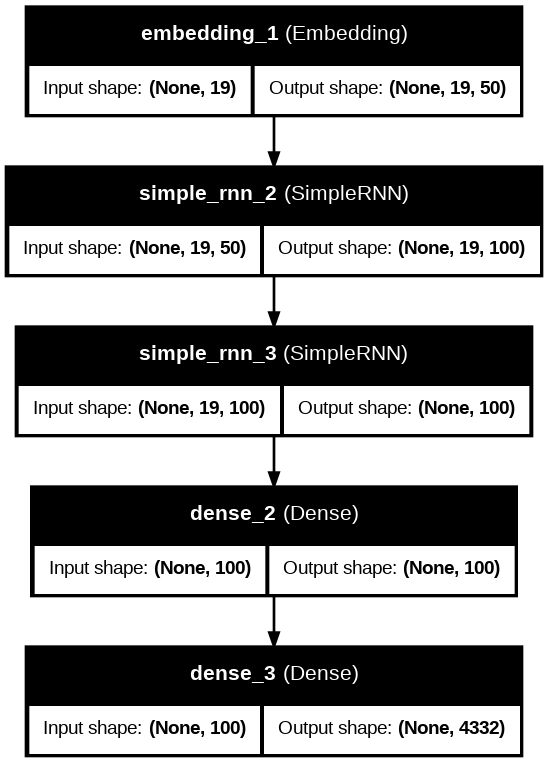

In [ ]:
from tensorflow.keras.utils import plot_model
model.build(input_shape=(None, max_sequence_len - 1))  # None para el tamaño de batch dinámico

# Graficar el modelo
plot_model(
    model,
    to_file="model_plot.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=96
)

In [ ]:

# 7. Entrenamiento del modelo
model.fit(X, y, epochs=100, batch_size=32)

# 8. Guardar el modelo en el formato recomendado por Keras 3
model.save('modelo_texto_diomedes.keras')

# 9. Función para generar texto a partir de una palabra dada


Ejemplo de datos: ['como nace el viento, como llega el verso apareciste tu llenandolo todo abarcandolo todo de donde es la dicha apareciste', 'tu mi nina es tan bella, que le dicen reina una multitud eso sienten otros, eso viven otros y mas', 'que su reina, quiero que seas tu hija tanto puedo amarte, pero no puedo ordenarte toda tu felicidad, aunque quisiera', 'salvarte hay un mundo inevitable que por ti debes andar que linda es mi nina sonriendose burlando la vida, sonriendose', 'un abrazo tuyo me hace olvidar el pesar mas grande abrazandome hay veces que temo algun dia sus suenos puedan', 'ser frenados, y no este a su lado para protegerla pero entonces canta, y luego me habla, y brilla su', 'vida y ya se que nada puede detenerla hija yo te quiero mucho, no lo olvides en el mundo que', 'tu debes conquistar antes que llegaras, de besar tu cara yo te amaba ya desde el infinito, desde lo mas', 'lindo y por muchas vidas yo te amaba ya yo podria esforzarme y a tus pies plantarte lo que qui

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.0466 - loss: 6.6205
Epoch 2/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.0551 - loss: 5.9682
Epoch 3/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.0621 - loss: 5.6848
Epoch 4/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.0819 - loss: 5.4279
Epoch 5/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.1051 - loss: 5.1780
Epoch 6/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.1364 - loss: 4.9093
Epoch 7/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.1722 - loss: 4.6024
Epoch 8/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.1977 - loss: 4.4019
Epoch 9/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.2379 - loss: 4.1266
Epoch 10/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.2671 - loss: 3.8763
Epoch 11/100
1192/1192 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.2974 - loss: 3.64

In [ ]:
# Guardar el modelo en el nuevo formato recomendado por Keras 3
model.save('modelo_texto_canciones.keras')  # Guardado en el nuevo formato .keras

# Guardar el modelo en formato HDF5 (si prefieres el formato HDF5)
model.save('modelo_texto_canciones.h5')  #

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parámetros de generación
text_length = 6  # Número de palabras en cada línea generada (ajustable)
seq_length = model.input_shape[1]  # Longitud de la secuencia de entrada esperada por el modelo

def generate_text(model, tokenizer, input_text, no_lines):
    general_text = []  # Lista para almacenar las líneas generadas
    for i in range(no_lines):
        text = []
        for _ in range(text_length):
            # Convertir el texto actual en una secuencia de enteros
            encoded = tokenizer.texts_to_sequences([input_text])
            # Aplicar padding a la secuencia
            encoded = pad_sequences(encoded, maxlen=seq_length, padding="pre")
            # Predecir la siguiente palabra
            y_pred = np.argmax(model.predict(encoded), axis=-1)

            # Buscar la palabra correspondiente en el índice del tokenizer
            predicted_word = ""
            for word, index in tokenizer.word_index.items():
                if index == y_pred:
                    predicted_word = word
                    break

            # Agregar la palabra predicha al texto
            input_text = input_text + ' ' + predicted_word
            text.append(predicted_word)

        # Actualizar `input_text` para la próxima línea con la última palabra generada
        input_text = text[-1]
        # Unir la línea generada y agregarla a `general_text`
        general_text.append(" ".join(text))

    return general_text

# Ejemplo de uso
input_text = "pedro"  # Palabra inicial
no_lines = 5          # Número de líneas de texto a generar

generated_text = generate_text(model, tokenizer, input_text, no_lines)
for line in generated_text:
    print(line)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [ ]:
input_text = "plata"  # Palabra inicial
no_lines = 5          # Número de líneas de texto a generar

generated_text = generate_text(model, tokenizer, input_text, no_lines)
for line in generated_text:
    print(line)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

In [ ]:
input_text = "navaja"  # Palabra inicial
no_lines = 5          # Número de líneas de texto a generar

generated_text = generate_text(model, tokenizer, input_text, no_lines)
for line in generated_text:
    print(line)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

# LSTM


## PUNTO 2

In [ ]:
import pandas as pd
import numpy  as np
#import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from textwrap import wrap

En este punto usamos el modelo ste modelo pertenece a la familia Helsinki-NLP, que incluye modelos optimizados para traducciones entre muchos pares de idiomas.
Este es Helsinki-NLP/opus-mt-en-es Es parte del proyecto Opus-MT, que utiliza datos paralelos de alta calidad para entrenar modelos de traducción automática.



In [ ]:
pip install transformers

In [ ]:
from transformers import MarianTokenizer, MarianMTModel

# Modelo específico para inglés a español
model_name = "Helsinki-NLP/opus-mt-en-es"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [ ]:

# Texto a traducir
texto = "Studies have shown that owning a dog is good for your health."

# Tokenizar y generar traducción
input_ids = tokenizer(texto, return_tensors="pt").input_ids
outputs = model.generate(input_ids)
traduccion = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Traducción:", traduccion)


Traducción: Los estudios han demostrado que poseer un perro es bueno para su salud.


In [ ]:

texto = "easy peasy lemon squeezy"

# Tokenizar y generar traducción
input_ids = tokenizer(texto, return_tensors="pt").input_ids
outputs = model.generate(input_ids)
traduccion = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Traducción:", traduccion)


Traducción: fácil apretón de limón


In [ ]:

texto = "Artificial intelligence will never replace humans... until it learns how to complain about Mondays."

# Tokenizar y generar traducción
input_ids = tokenizer(texto, return_tensors="pt").input_ids
outputs = model.generate(input_ids)
traduccion = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Traducción:", traduccion)


Traducción: La inteligencia artificial nunca reemplazará a los humanos... hasta que aprenda a quejarse de los lunes.


In [ ]:

texto = "Education plays a crucial role in shaping the future of societies. Access to quality education empowers individuals and fosters economic growth."

# Tokenizar y generar traducción
input_ids = tokenizer(texto, return_tensors="pt").input_ids
outputs = model.generate(input_ids)
traduccion = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Traducción:", traduccion)


Traducción: La educación desempeña un papel crucial en la configuración del futuro de las sociedades. El acceso a una educación de calidad potencia a las personas y fomenta el crecimiento económico.


##PUNTO 3


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import tensorflow_hub  as hub

In [ ]:
print("TensorFlow Hub version:", hub.__version__)

TensorFlow Hub version: 0.13.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Función para cargar y procesar datos desde un archivo
def load_and_process_data(filepath, label_encoder=None):
    texts, labels = [], []
    with open(filepath, 'r') as file:
        for line in file:
            text, label = line.strip().split(';')
            texts.append(text)
            labels.append(label)
    # Si no se ha proporcionado un label_encoder, crearlo y ajustarlo
    if label_encoder is None:
        label_encoder = LabelEncoder()
        labels_encoded = label_encoder.fit_transform(labels)
    else:
        labels_encoded = label_encoder.transform(labels)
    return texts, labels_encoded, label_encoder

# Cargar los conjuntos de datos
train_texts, train_labels, label_encoder = load_and_process_data('/content/train.txt')
val_texts, val_labels, _ = load_and_process_data('/content/val.txt', label_encoder=label_encoder)
test_texts, test_labels, _ = load_and_process_data('/content/test.txt', label_encoder=label_encoder)

# Verificar el número de clases y tamaño de los conjuntos de datos
num_classes = len(label_encoder.classes_)
len(train_texts), len(val_texts), len(test_texts), num_classes


(16000, 2000, 2000, 6)


El conjunto de datos utilizado contiene frases en inglés que expresan emociones humanas y están etiquetadas con emociones específicas como "joy", "sadness", "anger", entre otras. Este dataset se originó de Kaggle y se utiliza comúnmente para entrenar modelos de Procesamiento de Lenguaje Natural (PLN) con tareas de clasificación de emociones. El dataset está dividido en tres archivos: train.txt, val.txt y test.txt, que representan los conjuntos de entrenamiento, validación y prueba, respectivamente

# NNLM GOOGLE

El código entrena un modelo de clasificación de emociones usando TensorFlow Hub con el modelo preentrenado nnlm-en-dim128.
Acepta frases en inglés como entrada.

1.   Acepta frases en inglés como entrada.
2.   Convierte el texto en embeddings de 128 dimensiones que representan su significado.
3. Estos embeddings son procesados por una red neuronal con una capa oculta (relu) y una capa de salida (softmax) para clasificar emociones.





In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

# Crear el model_punto3o con TensorFlow Hub
module_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(module_url, input_shape=[], dtype=tf.string, trainable=True)

model_punto3 = tf.keras.Sequential([
    hub_layer,  # Capa preentrenada de embeddings
    tf.keras.layers.Dense(128, activation='relu'),  # Capa intermedia
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida para clasificación multiclase
])

# Compilar el model_punto3o
model_punto3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Para etiquetas como índices numéricos
              metrics=['accuracy'])

# Resumen del model_punto3o
model_punto3.summary()




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 6)                 774       
                                                                 
Total params: 124659974 (475.54 MB)
Trainable params: 124659974 (475.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Preparar los datos para entrenamiento
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(batch_size)

# Entrenar el model_punto3o
history = model_punto3.fit(train_dataset, validation_data=val_dataset, epochs=5)

# Mostrar historial de entrenamiento
history.history

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

# Cargar el modelo previamente guardado


# Función para cargar el archivo de test
def load_test_data(filepath):
    texts, labels = [], []
    with open(filepath, "r") as file:
        for line in file:
            text, label = line.strip().split(";")
            texts.append(text)
            labels.append(label)
    return texts, labels

# Cargar datos de test
test_texts, test_labels = load_test_data("/content/test.txt")

# Convertir etiquetas de texto a índices numéricos
label_to_index = {label: idx for idx, label in enumerate(sorted(set(test_labels)))}
index_to_label = {idx: label for label, idx in label_to_index.items()}
test_labels_numeric = np.array([label_to_index[label] for label in test_labels])

# Seleccionar algunos ejemplos aleatorios para realizar predicciones
sample_indices = np.random.choice(len(test_texts), size=10, replace=False)
sample_texts = [test_texts[i] for i in sample_indices]
sample_labels = [test_labels[i] for i in sample_indices]

# Realizar predicciones
predictions = model_punto3.predict(sample_texts)
predicted_labels = [index_to_label[np.argmax(pred)] for pred in predictions]

# Preparar los resultados en un DataFrame
results = pd.DataFrame({
    "Texto": sample_texts,
    "Etiqueta Real": sample_labels,
    "Etiqueta Predicha": predicted_labels
})

# Mostrar los resultados
print(results)



1/1 [==============================] - 0s 118ms/step
                                               Texto Etiqueta Real  \
0  i am feeling contented and pissed at the same ...           joy   
1  i hated that i have to work everyday with no d...       sadness   
2  i got a shot of terbutaline which makes you fe...          fear   
3                im feeling slightly irritable today         anger   
4  i also know that if today i refuse to hate jew...       sadness   
5  i feel very mislead by someone that i really r...          love   
6                     i feel so safe and tucked away           joy   
7     i feel much lighter clearer and more energetic           joy   
8  i check you when you re sleeping feel your nos...           joy   
9  i have a feeling i will be dissatisfied severa...         anger   

  Etiqueta Predicha  
0               joy  
1           sadness  
2              fear  
3             anger  
4             anger  
5              love  
6               joy  


El modelo muestra un buen desempeño al predecir las emociones en la mayoría de los casos, como se observa en las etiquetas predichas que coinciden con las etiquetas reales en varios ejemplos. Sin embargo, en algunos casos, como el 4 y el 8, el modelo clasificó incorrectamente las emociones, mostrando cierta dificultad para capturar la complejidad semántica de estos textos. A pesar de ello, la mayoría de las predicciones reflejan una tendencia correcta hacia la emoción predominante.

##Universal Sentence Encode

El código entrena un modelo de clasificación de emociones usando TensorFlow Hub con el modelo preentrenado Universal Sentence Encoder (USE).



1.  Acepta frases en inglés como entrada.
2.  Genera embeddings semánticos de alta calidad que capturan el contexto completo de cada oración.
3. Estos embeddings son procesados por una red neuronal con una capa oculta (relu) y una capa de salida (softmax) para clasificar las emociones en diferentes categorías.




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# URL del modelo preentrenado Universal Sentence Encoder
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(module_url, input_shape=[], dtype=tf.string, trainable=False)

# Crear el modelo de clasificación
model = tf.keras.Sequential([
    hub_layer,  # Capa preentrenada del USE
    tf.keras.layers.Dense(128, activation='relu'),  # Capa intermedia densa
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Capa de salida para multiclase
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Preparar los datos para entrenamiento
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(batch_size)

# Entrenar el modelo
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 256864262 (979.86 MB)
Trainable params: 66438 (259.52 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 13s 20ms/step - loss: 1.1489 - accuracy: 0.5799 - val_loss: 0.9789 - val_accuracy: 0.6375
Epoch 2/10
500/500 [==============================] - 8s 16ms/step - loss: 0.9412 - accuracy: 0.6527 - val_loss: 0.9443 - va

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

# Cargar el modelo previamente guardado


# Función para cargar el archivo de test
def load_test_data(filepath):
    texts, labels = [], []
    with open(filepath, "r") as file:
        for line in file:
            text, label = line.strip().split(";")
            texts.append(text)
            labels.append(label)
    return texts, labels

# Cargar datos de test
test_texts, test_labels = load_test_data("/content/test.txt")

# Convertir etiquetas de texto a índices numéricos
label_to_index = {label: idx for idx, label in enumerate(sorted(set(test_labels)))}
index_to_label = {idx: label for label, idx in label_to_index.items()}
test_labels_numeric = np.array([label_to_index[label] for label in test_labels])

# Seleccionar algunos ejemplos aleatorios para realizar predicciones
sample_indices = np.random.choice(len(test_texts), size=10, replace=False)
sample_texts = [test_texts[i] for i in sample_indices]
sample_labels = [test_labels[i] for i in sample_indices]

# Realizar predicciones
predictions = model.predict(sample_texts)
predicted_labels = [index_to_label[np.argmax(pred)] for pred in predictions]

# Preparar los resultados en un DataFrame
results = pd.DataFrame({
    "Texto": sample_texts,
    "Etiqueta Real": sample_labels,
    "Etiqueta Predicha": predicted_labels
})

# Mostrar los resultados
print(results)

1/1 [==============================] - 1s 511ms/step
                                               Texto Etiqueta Real  \
0                        i feel so amazing musicjuzz           joy   
1  i don t like outsourcing because i m a picky s...         anger   
2  i described how i was feeling the feeling of b...          fear   
3  i am not scared to let myself feel deeply many...          fear   
4  i do not want others to feel unhappy just beca...       sadness   
5                               i feel stupid enough       sadness   
6  i had been talking to coach claudia barcomb an...           joy   
7                 ive been feeling sort of depressed       sadness   
8  im feeling more lively than yesterday still no...           joy   
9  i always feel rushed during these emails which...         anger   

  Etiqueta Predicha  
0               joy  
1             anger  
2              fear  
3              fear  
4           sadness  
5           sadness  
6               joy  



El modelo muestra un buen desempeño al predecir las emociones en la mayoría de los casos, reflejando coincidencias entre las etiquetas reales y predichas, como se ve en los ejemplos Sin embargo, presenta errores en casos como el 9, donde la emoción real es "anger" pero se predijo "love", indicando dificultades para interpretar matices emocionales en textos más complejos. A pesar de ello, las predicciones en su mayoría capturan correctamente las emociones principales.